In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("Countries_Sugarcane_Production.csv")

In [3]:
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
data.shape

(103, 7)

## Data Cleaning

In [5]:
data.rename(columns = {"Production (Tons)" : "Prod_tons", "Production per Person (Kg)" : "Prod_kg_person",
                    "Acreage (Hectare)" : "Area_Hectare","Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace= True)

In [6]:
data.head()

,Unnamed: 0,Country,Continent,Prod_tons,Prod_kg_person,Area_Hectare,Yield(Kg/Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [7]:
data["Prod_tons"] = data["Prod_tons"].str.replace(".","")
data["Prod_kg_person"] = data["Prod_kg_person"].str.replace(".","").str.replace(",",".")
data["Area_Hectare"] = data["Area_Hectare"].str.replace(".","")
data["Yield(Kg/Hectare)"] = data["Yield(Kg/Hectare)"].str.replace(".","").str.replace(",",".")

In [8]:
data.head()

,Unnamed: 0,Country,Continent,Prod_tons,Prod_kg_person,Area_Hectare,Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [9]:
data.isna().sum()

Unnamed: 0           0
Country              0
Continent            0
Prod_tons            0
Prod_kg_person       0
Area_Hectare         1
Yield(Kg/Hectare)    1
dtype: int64

In [10]:
data[data["Area_Hectare"].isna()] #both null values are in the same row so we can remove it

,Unnamed: 0,Country,Continent,Prod_tons,Prod_kg_person,Area_Hectare,Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [57]:
data.dropna().reset_index(inplace = True)

In [58]:
data.drop(["Unnamed: 0"],axis = 1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [59]:
data.head()

,Country,Continent,Prod_tons,Prod_kg_person,Area_Hectare,Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            103 non-null    object
 1   Continent          103 non-null    object
 2   Prod_tons          103 non-null    object
 3   Prod_kg_person     103 non-null    object
 4   Area_Hectare       102 non-null    object
 5   Yield(Kg/Hectare)  102 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [15]:
col = ["Prod_tons","Prod_kg_person","Area_Hectare","Yield(Kg/Hectare)"]
for i in col:
    data[i] = data[i].astype(float)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            103 non-null    object 
 1   Continent          103 non-null    object 
 2   Prod_tons          103 non-null    float64
 3   Prod_kg_person     103 non-null    float64
 4   Area_Hectare       102 non-null    float64
 5   Yield(Kg/Hectare)  102 non-null    float64
dtypes: float64(4), object(2)
memory usage: 5.0+ KB


In [17]:
data.nunique()

Country              103
Continent              6
Prod_tons            103
Prod_kg_person       102
Area_Hectare         101
Yield(Kg/Hectare)    102
dtype: int64

## Univariate Analysis

In [18]:
data.head()

,Country,Continent,Prod_tons,Prod_kg_person,Area_Hectare,Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### How many countries produces sugarcane in each continent

<Axes: xlabel='Continent'>

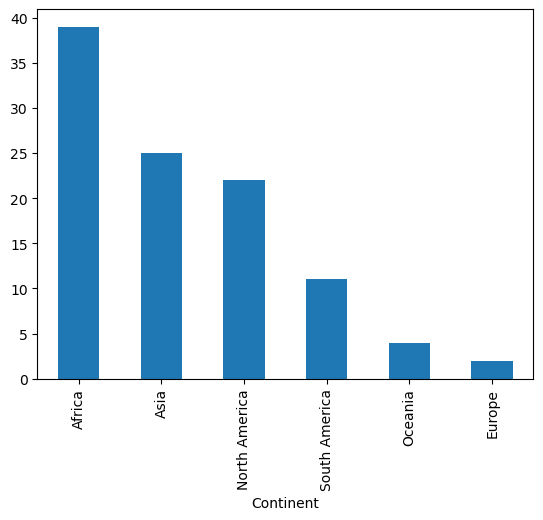

In [19]:
data["Continent"].value_counts().plot(kind="bar")

C:\Users\aryan\AppData\Local\Temp\ipykernel_17596\1873809740.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Prod_tons"])
C:\Users\aryan\AppData\Local\Temp\ipykernel_17596\1873809740.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Prod_kg_person"])
C:\Users\aryan\AppData\Loca

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

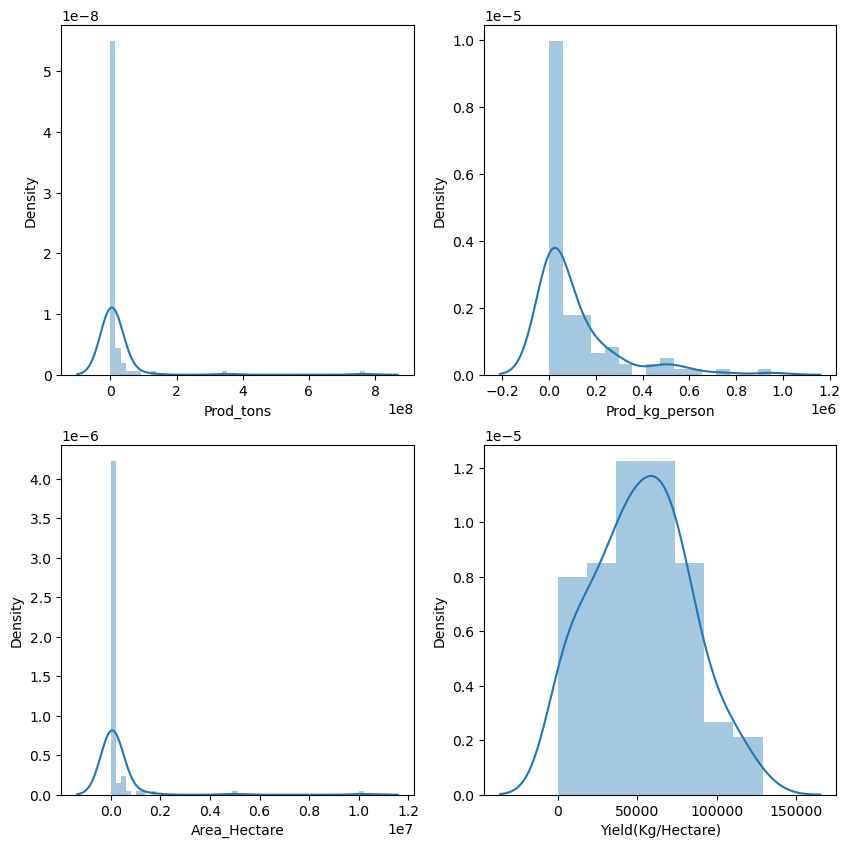

In [21]:
#Distribution of columns
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(data["Prod_tons"])
plt.subplot(2,2,2)
sns.distplot(data["Prod_kg_person"])
plt.subplot(2,2,3)
sns.distplot(data["Area_Hectare"])
plt.subplot(2,2,4)
sns.distplot(data["Yield(Kg/Hectare)"])

<Axes: >

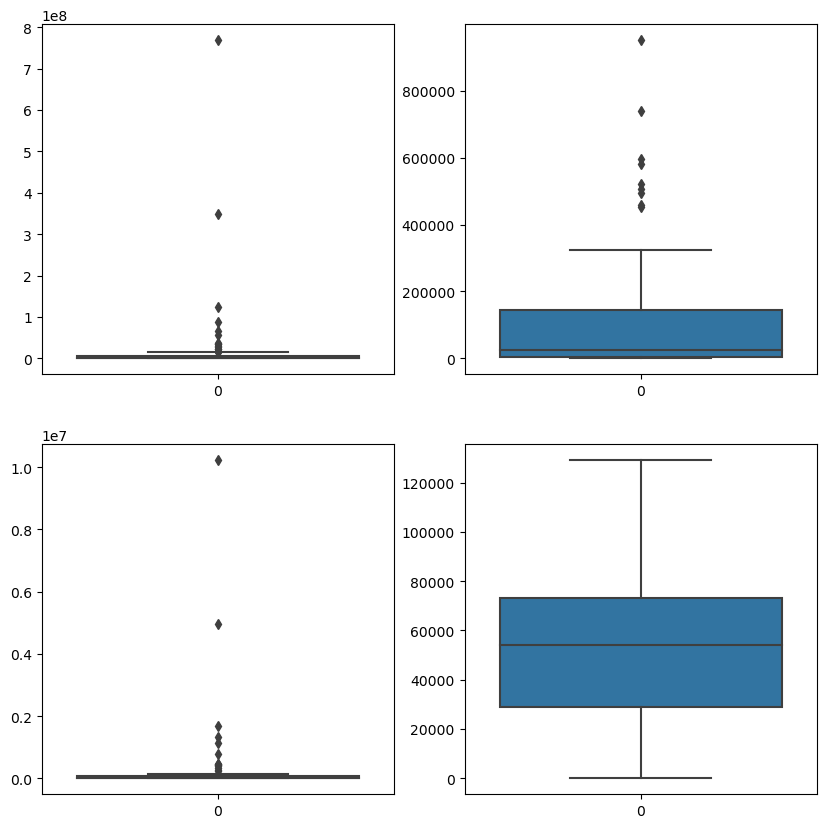

In [22]:
#For ourlier detection
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(data["Prod_tons"])
plt.subplot(2,2,2)
sns.boxplot(data["Prod_kg_person"])
plt.subplot(2,2,3)
sns.boxplot(data["Area_Hectare"])
plt.subplot(2,2,4)
sns.boxplot(data["Yield(Kg/Hectare)"])

In [23]:
data.describe()

,Prod_tons,Prod_kg_person,Area_Hectare,Yield(Kg/Hectare)
count,1.030000e+02,103.000000,1.020000e+02,102.000000
mean,1.832407e+07,111856.305311,2.498981e+05,52628.078431
std,8.379760e+07,176134.928689,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,4.298850e+04,3364.869000,1.104000e+03,29072.025000
50%,1.422432e+06,25481.000000,1.655800e+04,54108.950000
75%,6.145648e+06,144004.500000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Which Country is producing max sugercane in percentage

In [31]:
data_new = data[["Country","Prod_tons"]].set_index("Country")

In [32]:
data_new.head()

,Prod_tons
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0


In [33]:
data_new["Prod_percent"] = data_new["Prod_tons"] * 100 / data_new["Prod_tons"].sum()

In [34]:
data_new.head()

,Prod_tons,Prod_percent
Country,,
Brazil,768678382.0,40.727284
India,348448000.0,18.462001
China,123059739.0,6.520138
Thailand,87468496.0,4.634389
Pakistan,65450704.0,3.467809


In [36]:
max(data_new["Prod_percent"])

40.72728428923952

<Axes: ylabel='Prod_percent'>

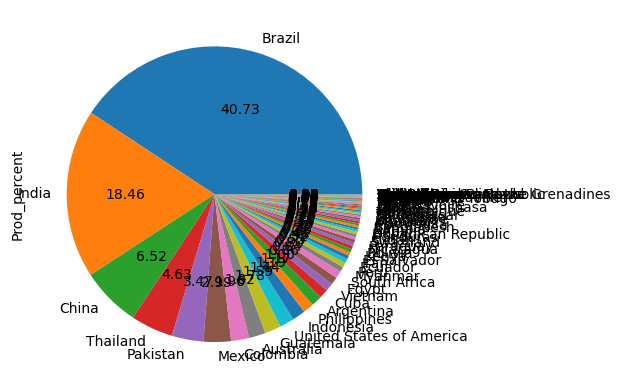

In [45]:
#finding out using pie chart
data_new["Prod_percent"].plot(kind="pie", autopct="%.2f")

<Axes: xlabel='Country'>

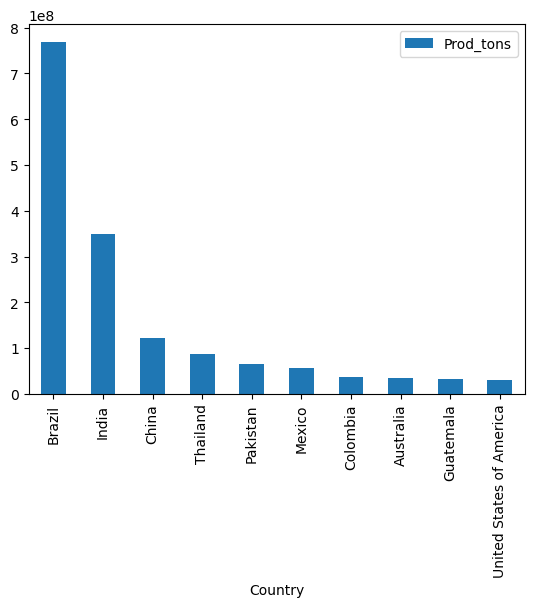

In [47]:
data_new.head(10).plot(kind="bar", y = "Prod_tons")

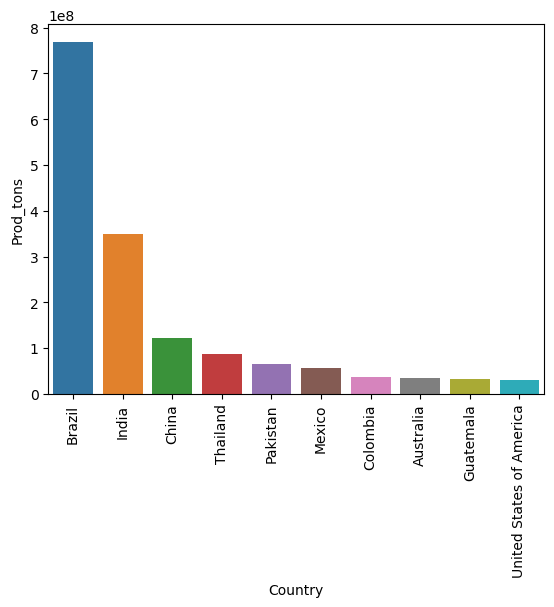

In [51]:
#Plotting using seaborn
graph = sns.barplot(data.head(10),x="Country",y="Prod_tons")
graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
plt.show()

## Which has the highest land

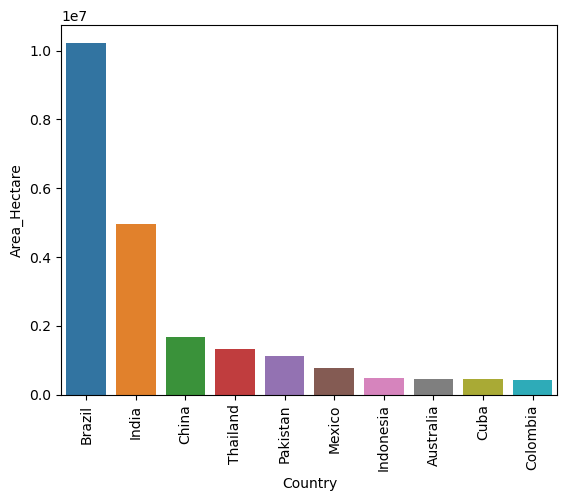

In [56]:
graph = sns.barplot(data.sort_values(by = "Area_Hectare",ascending=False).head(10),x="Country",y="Area_Hectare")
graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
plt.show()

## Highest Yield per hectare

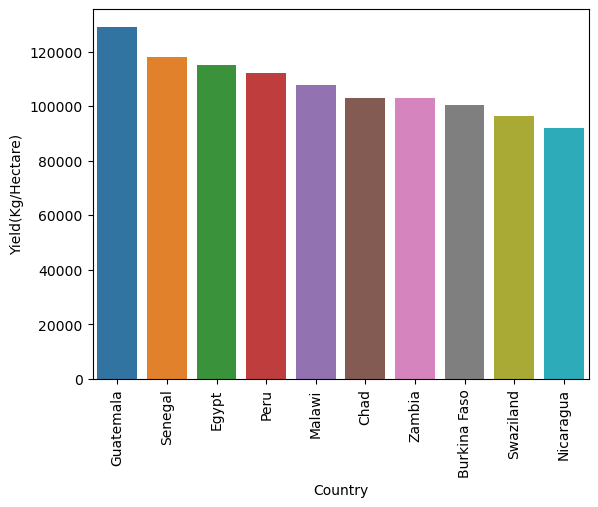

In [63]:
graph = sns.barplot(data.sort_values(by = "Yield(Kg/Hectare)", ascending=False).head(10),x="Country",y="Yield(Kg/Hectare)")
graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
plt.show()

In [62]:
data.sort_values(by="Yield(Kg/Hectare)",ascending=False)

,Country,Continent,Prod_tons,Prod_kg_person,Area_Hectare,Yield(Kg/Hectare)
8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3
57,Senegal,Africa,696992.0,44321.000,5902.0,118085.3
15,Egypt,Africa,15760418.0,161651.000,137011.0,115030.6
18,Peru,South America,9832526.0,314768.000,87696.0,112120.2
40,Malawi,Africa,2915406.0,162584.000,27087.0,107629.5
...,...,...,...,...,...,...
55,Trinidad and Tobago,North America,810.0,597066.000,15.0,54.0
100,Singapore,Asia,50.0,9.000,2.0,25.0
87,Iraq,Asia,1167.0,297.000,584.0,20.0
96,Yemen,Asia,500.0,17.000,50.0,10.0


## Which country has highest production per person?

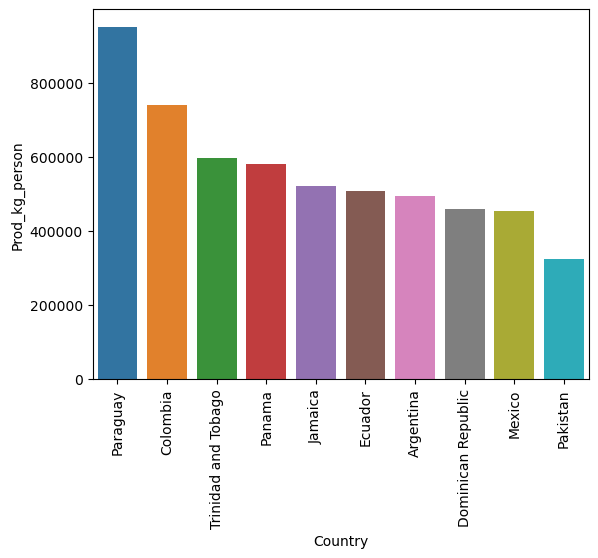

In [64]:
g = sns.barplot(data.sort_values(by = "Prod_kg_person", ascending=False).head(10),x = "Country", y = "Prod_kg_person")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

## Correlation

In [66]:
data.corr(numeric_only = True)

,Prod_tons,Prod_kg_person,Area_Hectare,Yield(Kg/Hectare)
Prod_tons,1.000000,0.016341,0.997550,0.132812
Prod_kg_person,0.016341,1.000000,0.012557,0.017999
Area_Hectare,0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

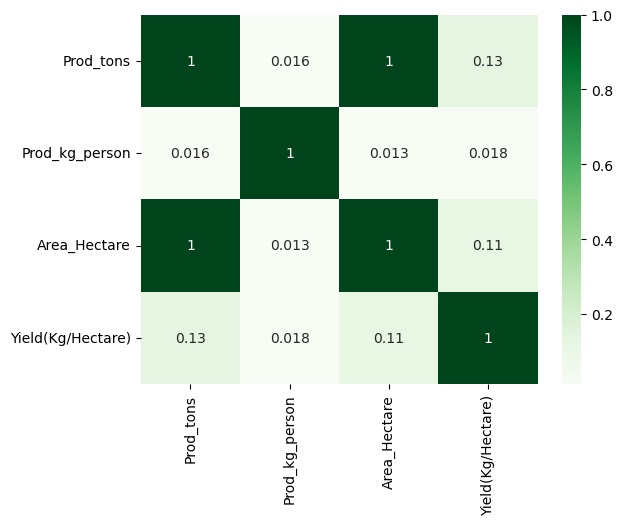

In [70]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="Greens")

## Do countries with highest land produce more sugarcane?

<Axes: xlabel='Area_Hectare', ylabel='Prod_tons'>

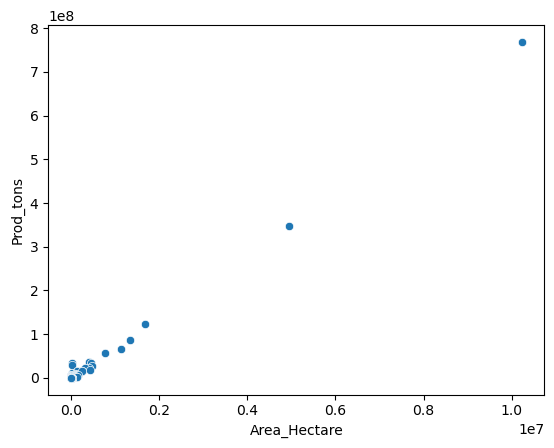

In [72]:
#we can see this using above correlation and also using scatterplot
sns.scatterplot(data, x = "Area_Hectare",y="Prod_tons")

# Analysis for Continent

In [73]:
data.head()

,Country,Continent,Prod_tons,Prod_kg_person,Area_Hectare,Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [74]:
data_continent = data.groupby("Continent").sum()

In [79]:
data_continent.drop("Country", axis = 1,inplace=True)

In [80]:
data_continent

,Prod_tons,Prod_kg_person,Area_Hectare,Yield(Kg/Hectare)
Continent,,,,
Africa,89681525.0,2332687.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


<Axes: xlabel='Continent'>

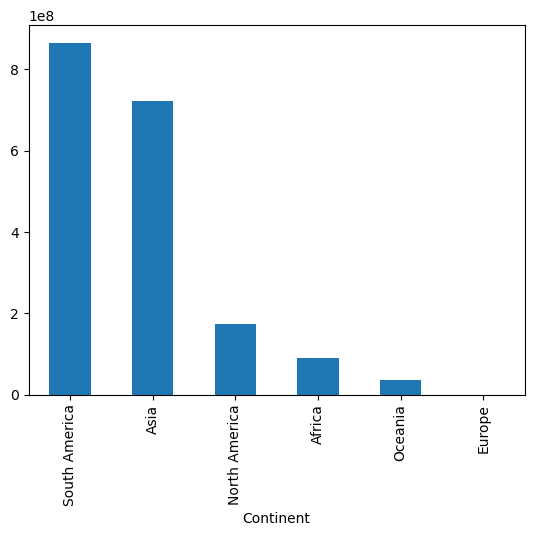

In [81]:
data_continent["Prod_tons"].sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='Continent'>

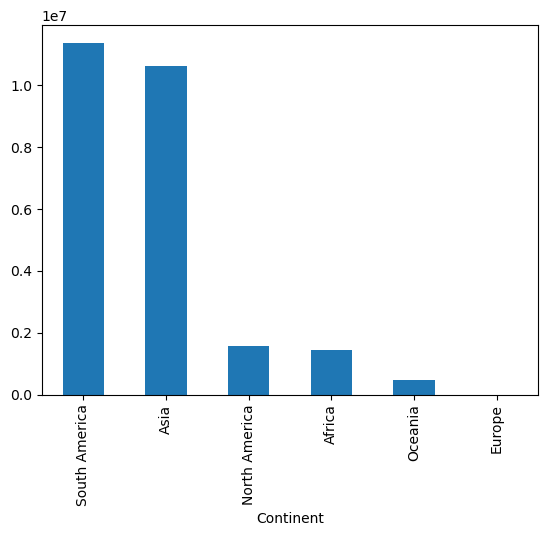

In [82]:
data_continent["Area_Hectare"].sort_values(ascending=False).plot(kind="bar")

In [84]:
data["Continent"].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [85]:
data_continent

,Prod_tons,Prod_kg_person,Area_Hectare,Yield(Kg/Hectare)
Continent,,,,
Africa,89681525.0,2332687.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


In [86]:
data_continent["No_Countries"] = data.groupby("Continent").count()["Country"] 

In [87]:
data_continent

,Prod_tons,Prod_kg_person,Area_Hectare,Yield(Kg/Hectare),No_Countries
Continent,,,,,
Africa,89681525.0,2332687.293,1439089.0,2142107.5,39
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


In [88]:
data_continent.corr(numeric_only=True)

,Prod_tons,Prod_kg_person,Area_Hectare,Yield(Kg/Hectare),No_Countries
Prod_tons,1.000000,0.522207,0.994897,0.091201,0.098495
Prod_kg_person,0.522207,1.000000,0.463211,0.542971,0.531984
Area_Hectare,0.994897,0.463211,1.000000,0.111166,0.122407
Yield(Kg/Hectare),0.091201,0.542971,0.111166,1.000000,0.991746
No_Countries,0.098495,0.531984,0.122407,0.991746,1.000000


<Axes: >

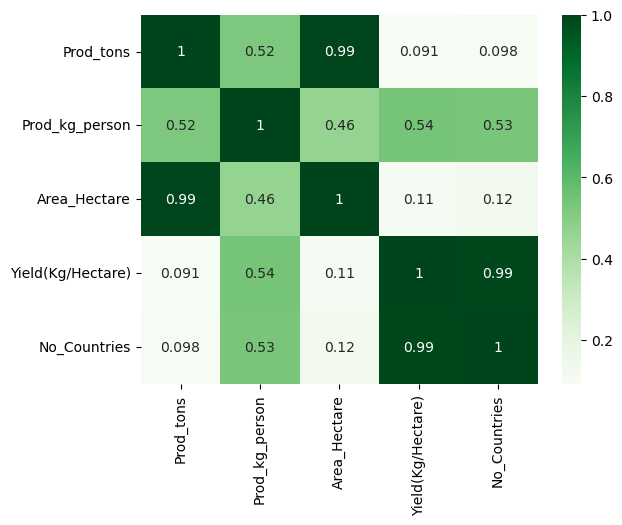

In [92]:
sns.heatmap(data_continent.corr(numeric_only=True),annot=True,cmap="Greens")

## Production distribution

<Axes: ylabel='Prod_tons'>

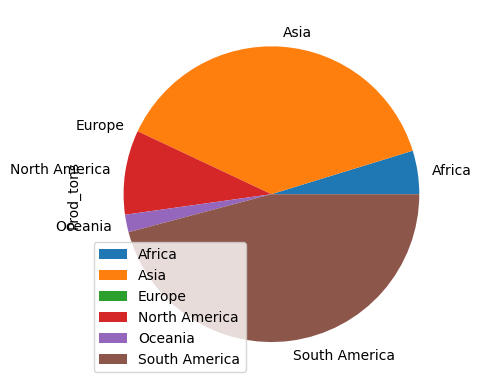

In [93]:
data_continent.plot(kind="pie", y="Prod_tons")